# Data Visualization

In [1]:
#line plots, bar plots, box plots, scatter plots 

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

plt.style.use('fivethirtyeight')

plt.rcParams['figure.figsize'] = [12, 5]

In [4]:
df  = pd.DataFrame(np.random.randn(10,4),
                  columns = ['col1','col2','col3','col4'],
                   index = ['a','b','c','d','e','f','g','h','i','j'])

In [5]:
df

,col1,col2,col3,col4
a,-1.201819,-0.131148,-0.005253,0.131036
b,-0.152812,0.093777,1.381456,1.385733
c,1.280987,0.111219,0.122126,-0.766248
d,-0.515464,-0.622128,0.701143,0.766259
e,-1.569175,-1.426526,-1.204982,-0.542216
f,-0.106950,1.143922,1.325120,1.498937
g,1.048693,0.663014,0.438186,0.729187
h,1.086956,1.406038,0.566937,-1.644624
i,1.238723,0.134287,-0.441653,0.904828
j,-2.133018,-0.464498,1.188392,-1.361424


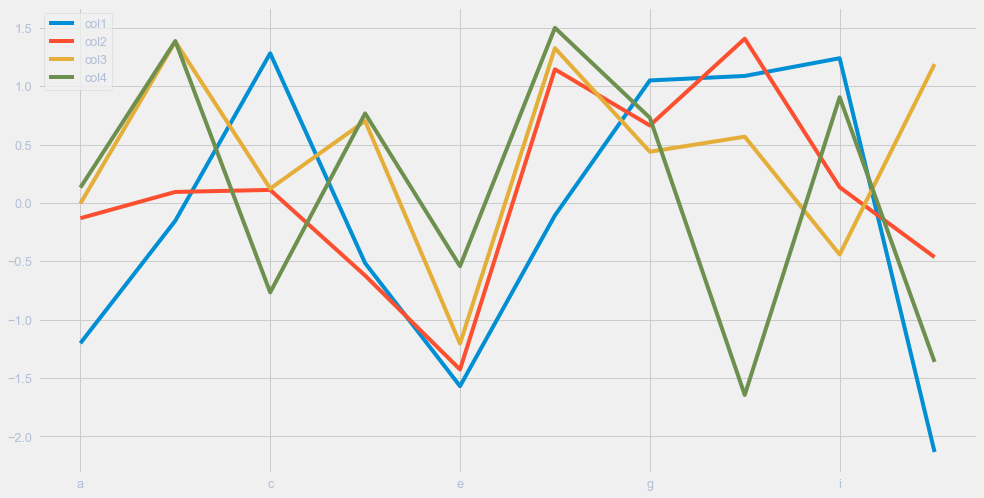

In [11]:
df.plot(figsize = (15, 8))

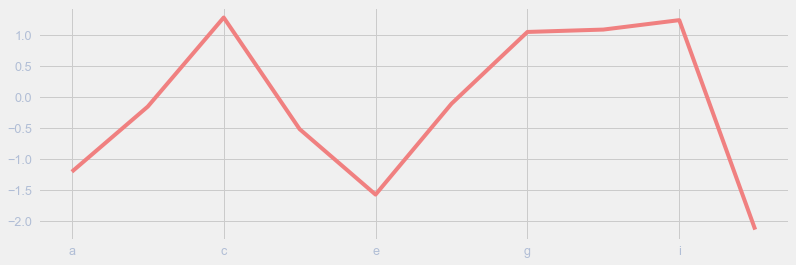

In [17]:
df['col1'].plot(figsize = (12,4), color = 'lightcoral' )

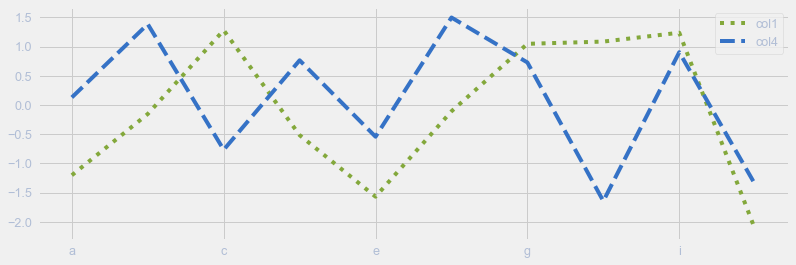

In [28]:
df[['col1','col4']].plot(figsize = (12,4), style = {'col1': ':g',  'col4': '--b'} )

### Line plots on actual data

In [174]:
housing_csv = pd.read_csv('data/boston_housing_data.csv')

ufo = pd.read_csv('data/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo['Time'])

In [44]:
ufo['Year'] = ufo.Time.dt.year

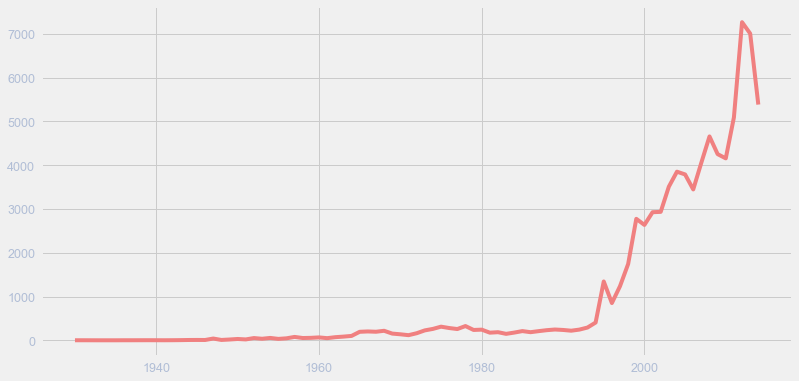

In [53]:
ufo.Year.value_counts().sort_index().plot(figsize=(12,6), color = 'lightcoral')

In [55]:
names_cols = ['country','beer','spirit','wine','liters','continent']
drinks = pd.read_csv('data/drinks.csv', header = 0, names = names_cols, na_filter = False)

In [56]:
drinks

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


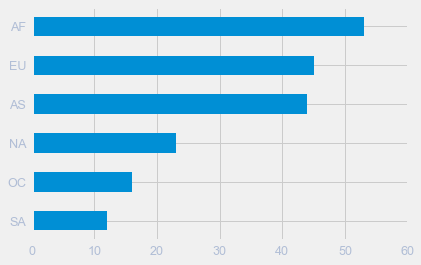

In [108]:
drinks.continent.value_counts().sort_values(ascending = True).plot(kind = 'barh', xticks = [i * 10 for i in list(range(0, drinks.continent.value_counts().count() +1))])

In [115]:
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [116]:
drinks.groupby('continent').agg(['mean','min','max'])

beer               spirit                 wine           \
                 mean min  max        mean min  max        mean min  max   
continent                                                                  
AF          61.471698   0  376   16.339623   0  152   16.264151   0  233   
AS          37.045455   0  247   60.840909   0  326    9.068182   0  123   
EU         193.777778   0  361  132.555556   0  373  142.222222   0  370   
NA         145.434783   1  285  165.739130  68  438   24.521739   1  100   
OC          89.687500   0  306   58.437500   0  254   35.625000   0  212   
SA         175.083333  93  333  114.750000  25  302   62.416667   1  221   

             liters             
               mean  min   max  
continent                       
AF         3.007547  0.0   9.1  
AS         2.170455  0.0  11.5  
EU         8.617778  0.0  14.4  
NA         5.995652  2.2  11.9  
OC         3.381250  0.0  10.4  
SA         6.308333  3.8   8.3

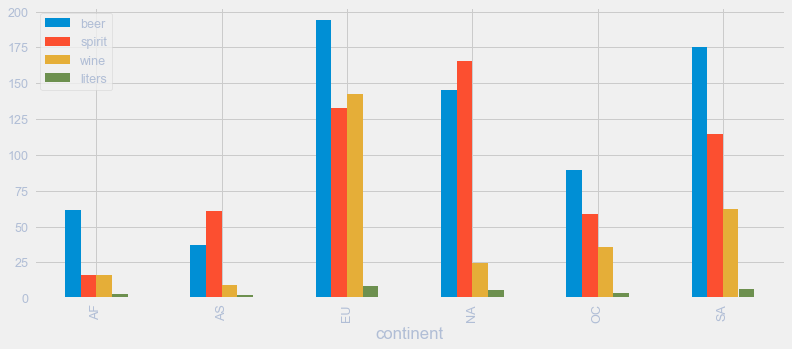

In [119]:
drinks.groupby('continent').mean().plot(kind='bar', figsize = (12,5))

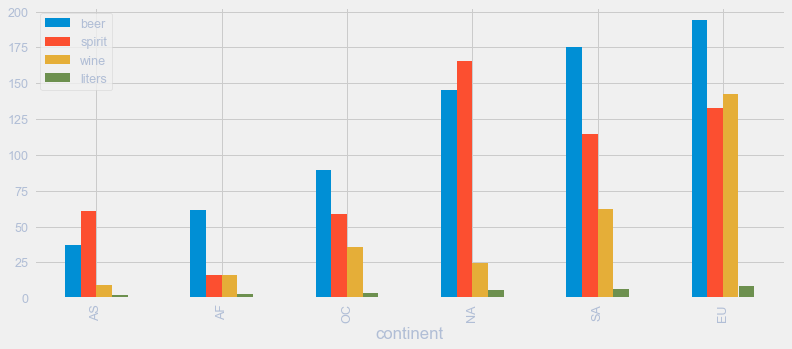

In [121]:
drinks.groupby('continent').mean().sort_values('beer').plot(kind='bar', figsize = (12,5))

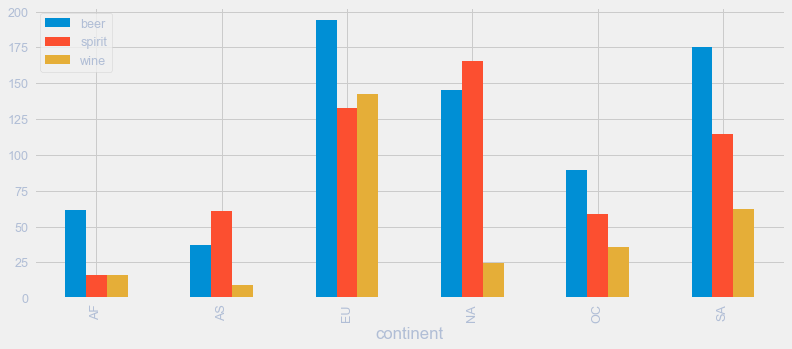

In [127]:
drinks.groupby('continent').mean().drop('liters', axis = 1).plot(kind='bar',figsize = (12,5))

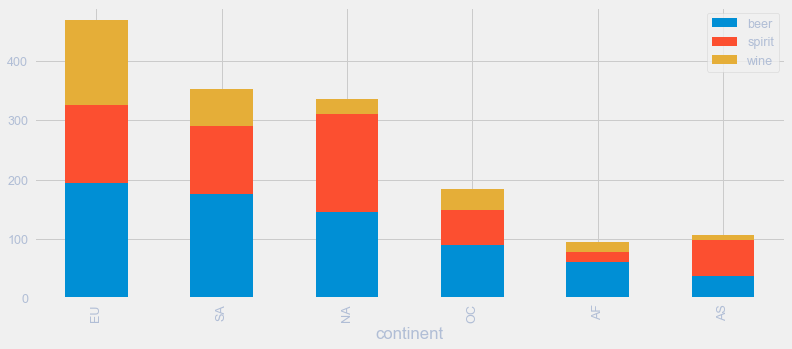

In [137]:
drinks.groupby('continent').mean().sort_values('beer', ascending = False).drop('liters', axis = 1).plot(kind='bar', stacked = True)

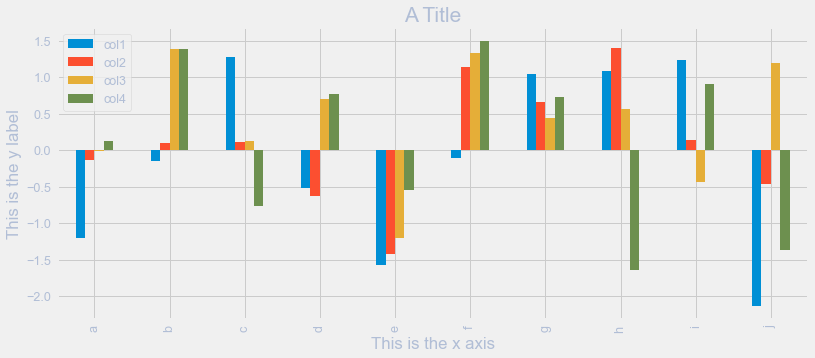

In [155]:
ax = df.plot(kind='bar')

#method to set title
ax.set_title('A Title', fontsize = 21)

#method to set labels
ax.set_ylabel('This is the y label')

ax.set_xlabel('This is the x axis')

#change legened location
ax.legend(loc = 2)

### Challenge: Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

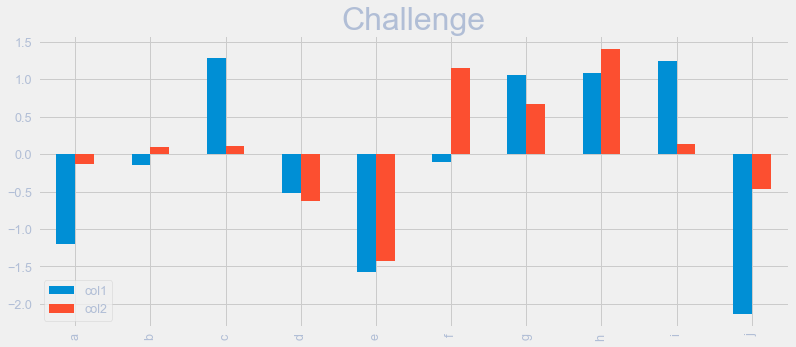

In [158]:
challenge = df[['col1','col2']].plot(kind = 'bar')
challenge.set_title('Challenge', fontsize = 32)
challenge.legend(loc=3)


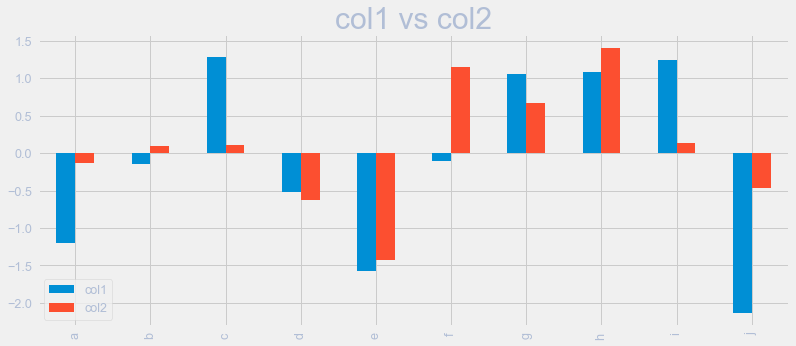

In [159]:
df[['col1','col2']].plot(kind = 'bar')

plt.title("col1 vs col2", fontsize = 30)
plt.legend(loc = "lower left")

# Histograms

In [164]:
drinks.beer.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

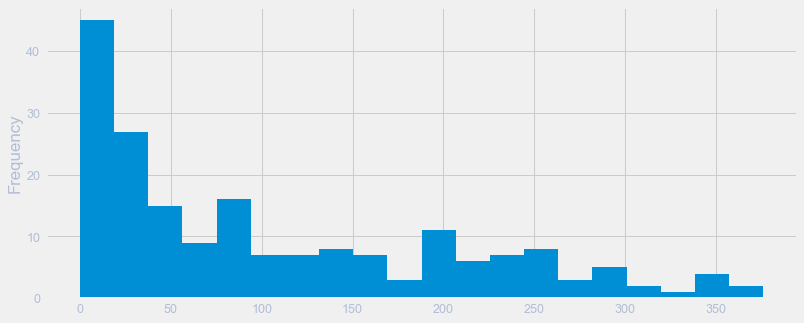

In [168]:
drinks.beer.plot(kind='hist', bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B64B16AF0>,
      dtype=object)

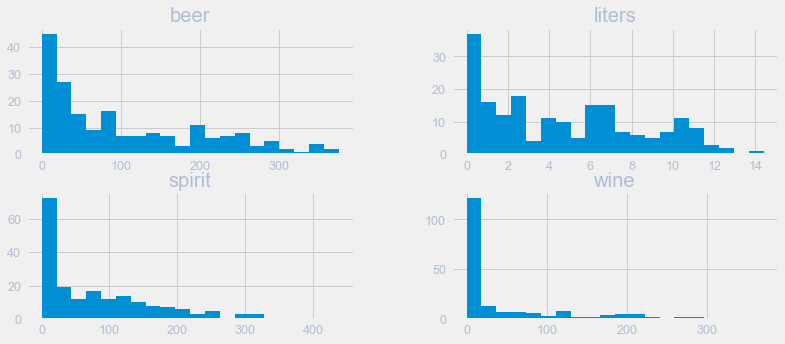

In [171]:
drinks.hist(bins = 20)

In [175]:
housing_csv

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Challenge: Create a histogram with pandas for using `MEDV` in the housing data.


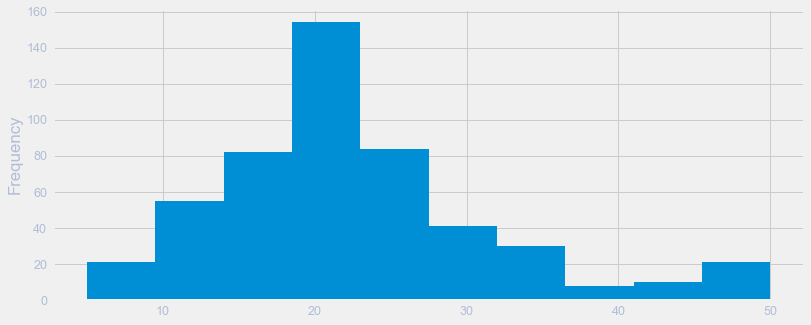

In [177]:
ax = housing_csv.MEDV.plot(kind = 'hist')

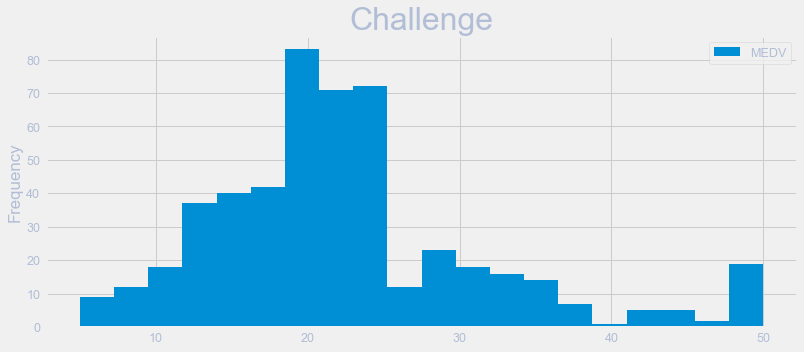

In [183]:
challenge = housing_csv['MEDV'].plot(kind = 'hist', bins = 20)
challenge.set_title('Challenge', fontsize = 32)
challenge.legend(loc=1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B67EA4070>,
      dtype=object)

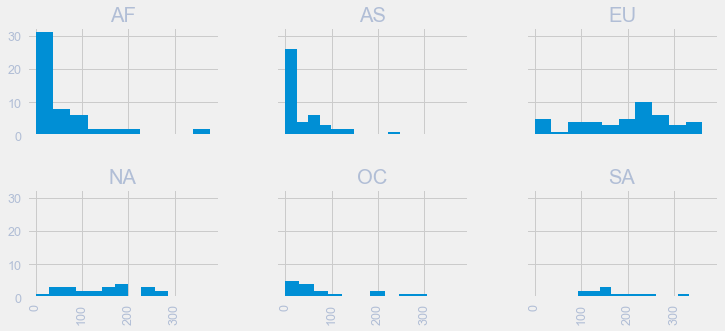

In [188]:
drinks.hist(column = 'beer', by = 'continent', sharex = True, sharey = True, layout = (2,3))

# Boxplots

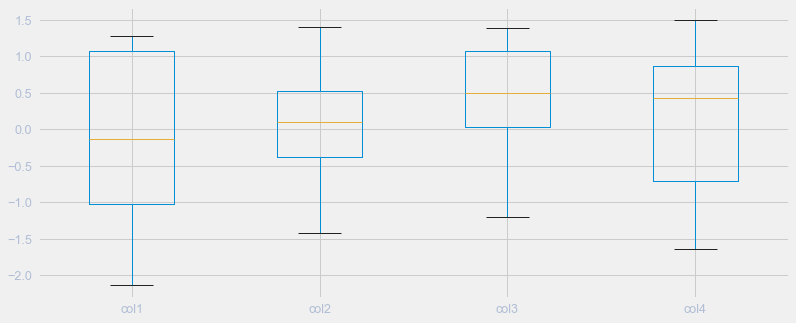

In [190]:
df.boxplot()

In [191]:
df.describe()

,col1,col2,col3,col4
count,10.000000,10.000000,10.000000,10.000000
mean,-0.102388,0.090796,0.407147,0.110147
std,1.252052,0.839102,0.822324,1.127430
min,-2.133018,-1.426526,-1.204982,-1.644624
25%,-1.030230,-0.381161,0.026592,-0.710240
50%,-0.129881,0.102498,0.502562,0.430112
75%,1.077390,0.530832,1.066580,0.870186
max,1.280987,1.406038,1.381456,1.498937


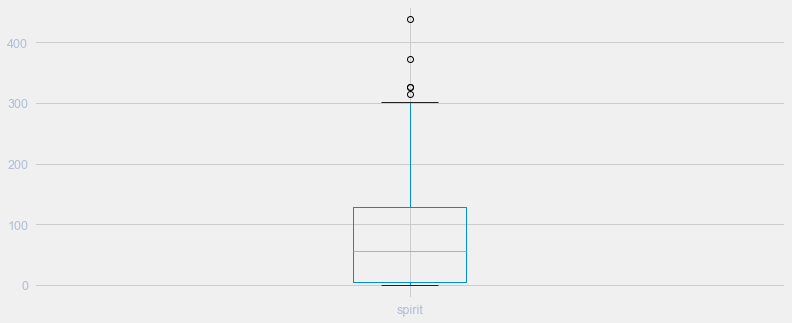

In [193]:
drinks.spirit.plot(kind='box')

In [ ]:
IQR = Q3 - Q1  
above = Q3 + 1.5 * IQR
below = Q1 - 1.5 * IQR

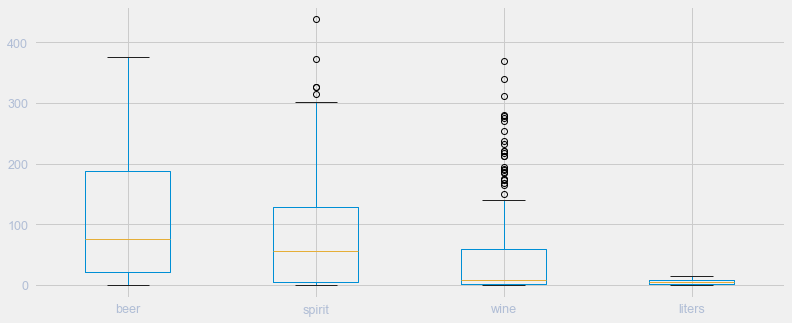

In [194]:
drinks.plot(kind='box')

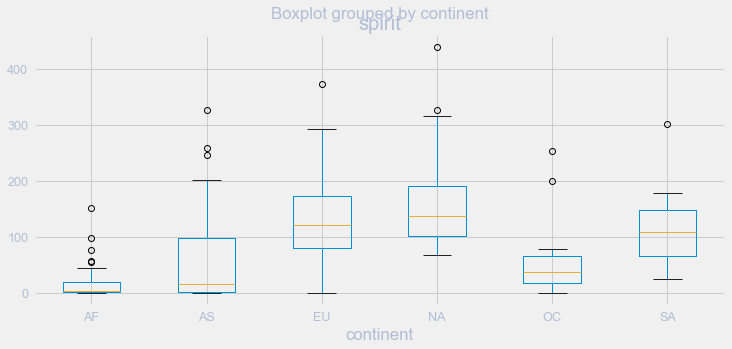

In [196]:
drinks.boxplot(column= 'spirit', by='continent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B6979AB20>,
      dtype=object)

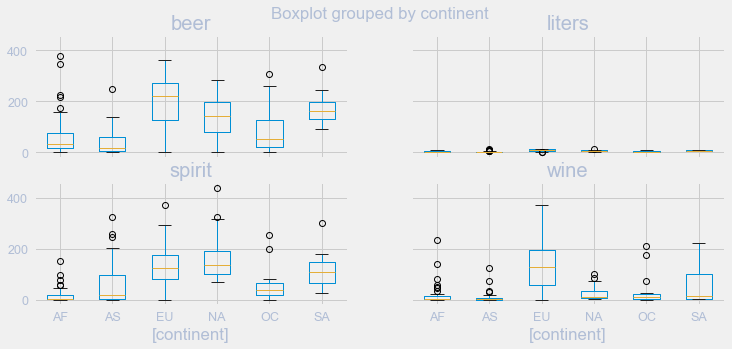

In [197]:
drinks.boxplot(by='continent')

# Scatterplot

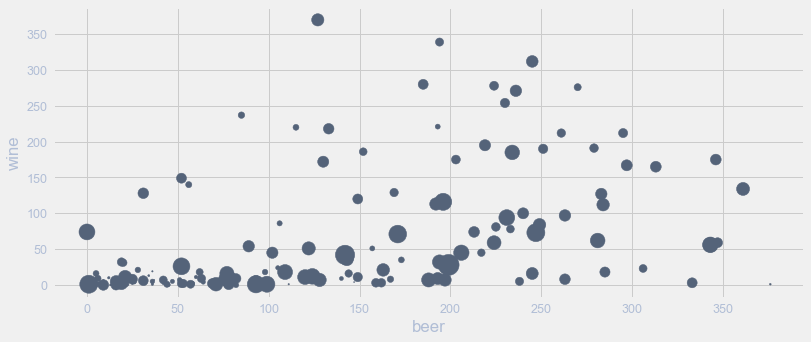

In [212]:
drinks.plot(kind='scatter', x='beer', y='wine', s = [drinks['spirit']])

In [201]:
# understanding correlations with scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B69DC33A0>,
      dtype=object)

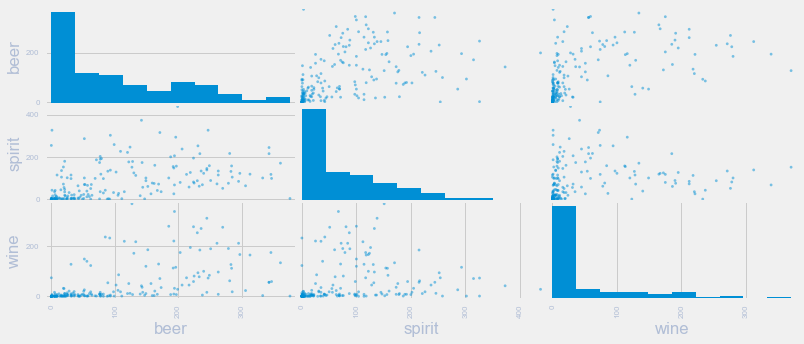

In [203]:
pd.plotting.scatter_matrix(drinks[['beer','spirit','wine']])

# Seaborn

In [214]:
housing_csv.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.300774,0.590822,0.013922,0.634679,-0.190197,0.482013,-0.495148,-0.088451,0.793392,0.362615,-0.377013,0.481907,-0.362077
ZN,-0.300774,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.566660,-0.119290,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.590822,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.678498,-0.087615,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.013922,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.090950,0.079105,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.634679,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.748872,0.009217,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.190197,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.225052,0.088753,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.482013,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.713313,0.019658,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.495148,0.566660,-0.678498,-0.090950,-0.748872,0.225052,-0.713313,1.000000,0.003030,-0.541369,-0.269140,0.293621,-0.479158,0.264325
RAD,-0.088451,-0.119290,-0.087615,0.079105,0.009217,0.088753,0.019658,0.003030,1.000000,-0.049221,-0.116969,0.040705,-0.069828,0.113519
TAX,0.793392,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.541369,-0.049221,1.000000,0.460853,-0.441808,0.543993,-0.468536


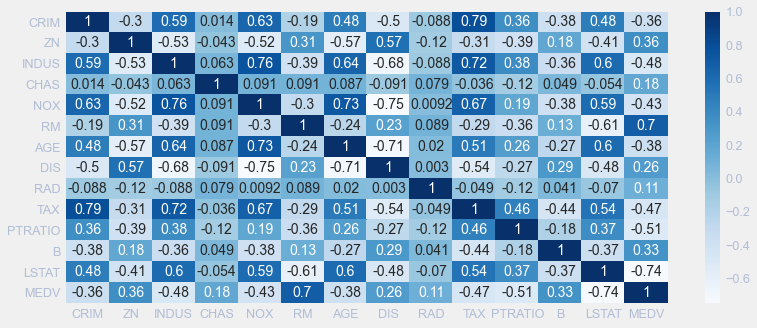

In [219]:
sns.heatmap(housing_csv.corr(), annot=True, cmap = 'Blues')

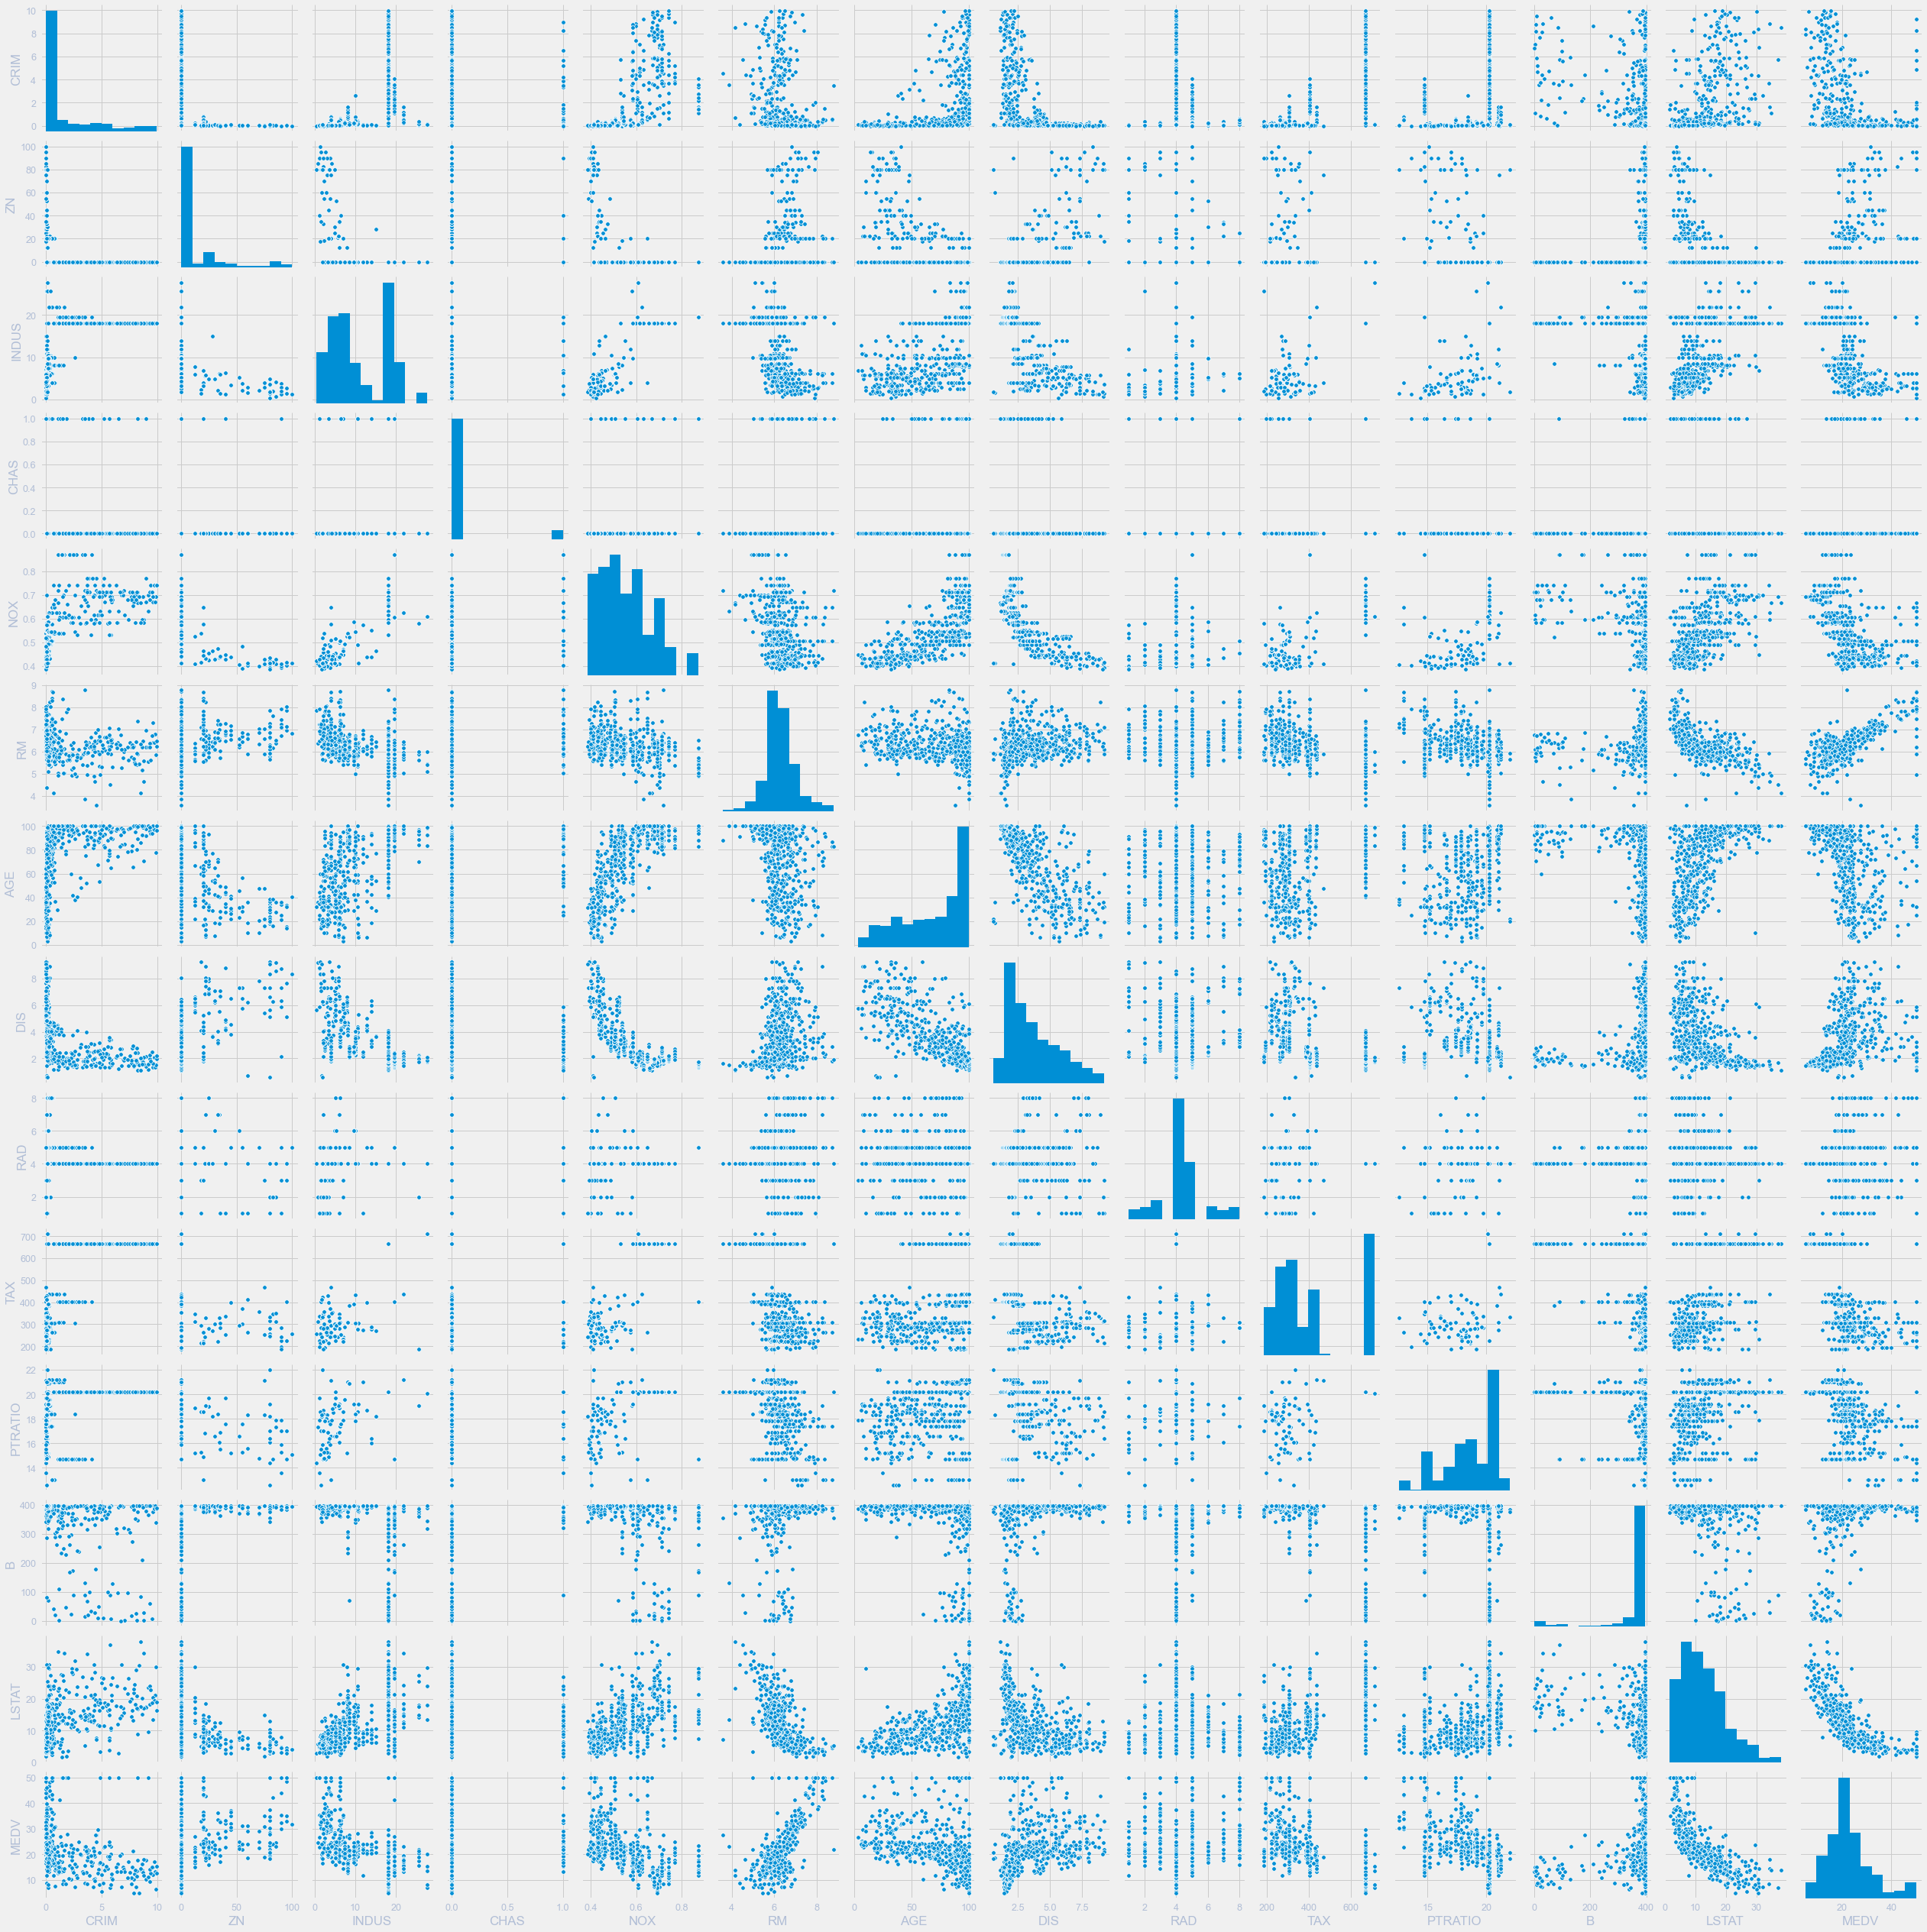

In [217]:
sns.pairplot(housing_csv)